In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [5]:
import pickle

In [6]:
with open('df_unsw_train50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [7]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 209)
X teste =  (380959, 209)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [8]:
#X_train50_train.head()
X_train50_train

array([[1.40531784e-07, 2.88107071e-04, 1.67558916e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76344888e-06, 1.33744095e-04, 2.94183243e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.76941473e-06, 2.95351543e-05, 6.02011348e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.02859494e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54289241e-10, 7.94105563e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.05094116e-06, 3.38679057e-04, 5.27210210e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

152963      Benign
627588      Benign
37398       Benign
486419      Benign
1203796     Benign
            ...   
110268      Benign
259178      Benign
131932     Generic
671155     Generic
121958      Benign
Name: Label_multiclass, Length: 888903, dtype: object
152963     0
627588     0
37398      0
486419     0
1203796    0
          ..
110268     0
259178     0
131932     1
671155     1
121958     0
Name: Label_binary, Length: 888903, dtype: int64


In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [12]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [13]:
with open('df_unsw_test50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [14]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 209)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [17]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [20]:
#X_test50.head()
X_test50

array([[2.92892409e-08, 9.05558976e-06, 1.10523389e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.64863197e-08, 1.01701239e-05, 1.21439279e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31433861e-10, 1.83898130e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.46883357e-07, 1.42660368e-04, 1.64420597e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.65139889e-05, 9.51672825e-04, 3.74016606e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.84637935e-07, 2.58864482e-03, 2.30598182e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']
[0 0 0 ... 0 0 0]


# Algoritmo kNN para Train e Validation - Train50

In [22]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [23]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [24]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [26]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9962436902658817

### Visualização da árvore binária

In [29]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [30]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [31]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [32]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [33]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [34]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [36]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [37]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [38]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9783677508603288

### Visualização da árvore multiclasse

In [39]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [40]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [41]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [42]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [43]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.997340  0.998362  0.997851    332789
           1   0.988605  0.981607  0.985094     48170

    accuracy                       0.996244    380959
   macro avg   0.992973  0.989985  0.991472    380959
weighted avg   0.996236  0.996244  0.996238    380959



In [44]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.087649  0.112821  0.098655       390
      Backdoor   0.027624  0.028329  0.027972       353
        Benign   0.997071  0.998434  0.997752    332789
           DoS   0.316521  0.324247  0.320338      2458
      Exploits   0.616685  0.674922  0.644490      6703
       Fuzzers   0.646452  0.589113  0.616452      3619
       Generic   0.993949  0.977256  0.985532     32272
Reconnaissance   0.724177  0.602455  0.657732      2118
     Shellcode   0.629268  0.563319  0.594470       229
         Worms   0.000000  0.000000  0.000000        28

      accuracy                       0.978368    380959
     macro avg   0.503940  0.487090  0.494339    380959
  weighted avg   0.978751  0.978368  0.978483    380959



### Cross Validation do train50

In [45]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [46]:
score_cv_train50_binary

array([0.99635509, 0.99632134, 0.99596135, 0.99617505, 0.99615255,
       0.99610755, 0.9961413 , 0.99601755, 0.9962988 , 0.99579255])

In [47]:
cv_result_train50_binary

[0.9961323111286198]

In [48]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [49]:
score_cv_train50_multiclass

array([0.97853551, 0.97930049, 0.97788303, 0.97870402, 0.97780403,
       0.97800652, 0.97855777, 0.97837777, 0.97852402, 0.97810777])

In [50]:
cv_result_train50_multiclass

[0.9783800925649379]

### Matriz de Confusão do train50

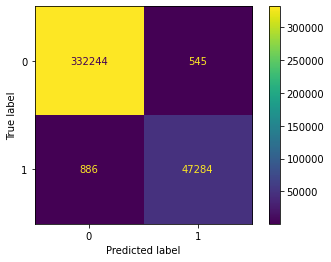

In [51]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

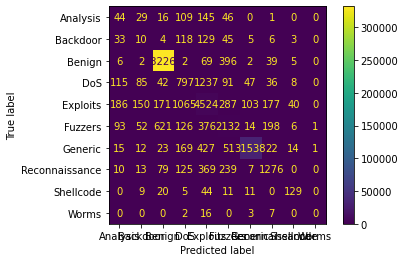

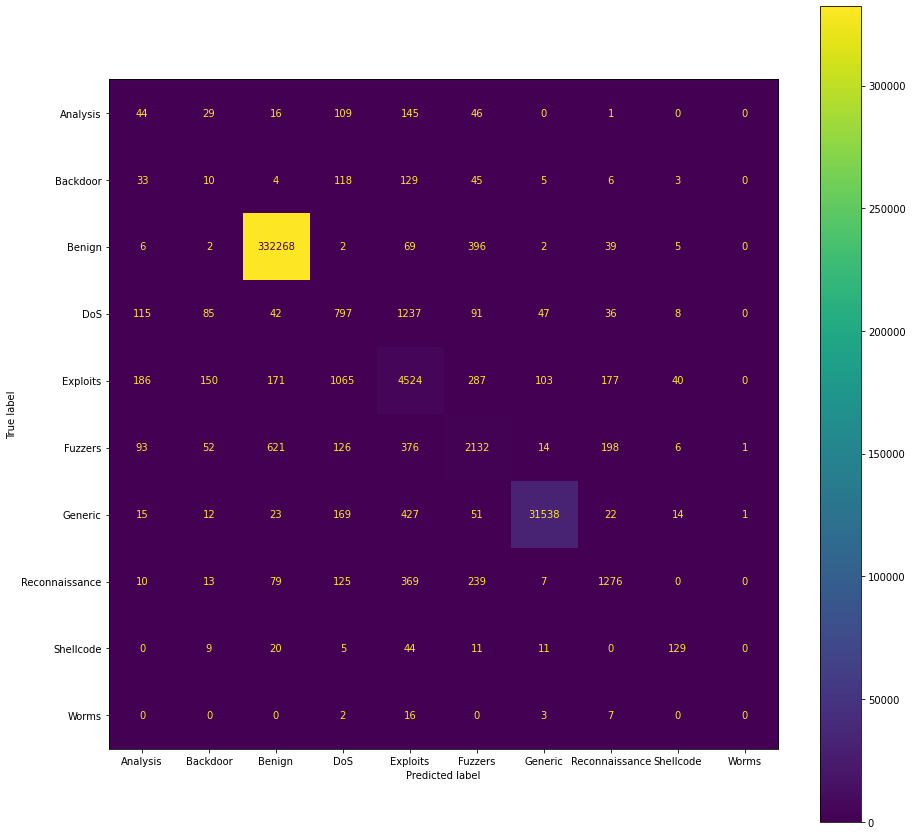

In [52]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [53]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [54]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8398954533713846

### Predição test50 multiclasse

In [57]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [58]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Exploits', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [59]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [60]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8214627708164024

### Precision e Recall do test50

In [61]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999220  0.817347  0.899179   1109226
           1   0.441146  0.995593  0.611387    160638

    accuracy                       0.839895   1269864
   macro avg   0.720183  0.906470  0.755283   1269864
weighted avg   0.928623  0.839895  0.862773   1269864



In [62]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.082515  0.094170  0.087958      1338
      Backdoor   0.057030  0.049828  0.053187      1164
        Benign   0.999055  0.817515  0.899214   1109226
           DoS   0.243475  0.465509  0.319724      8176
      Exploits   0.100266  0.646123  0.173594     22262
       Fuzzers   0.294062  0.642168  0.403399     12123
       Generic   0.641680  0.979970  0.775540    107740
Reconnaissance   0.490166  0.591592  0.536124      6993
     Shellcode   0.416742  0.606623  0.494067       755
         Worms   0.100000  0.011494  0.020619        87

      accuracy                       0.821463   1269864
     macro avg   0.342499  0.490499  0.376343   1269864
  weighted avg   0.936342  0.821463  0.863605   1269864



### Matriz de Confusão do test50

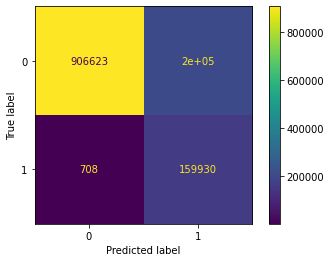

In [63]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

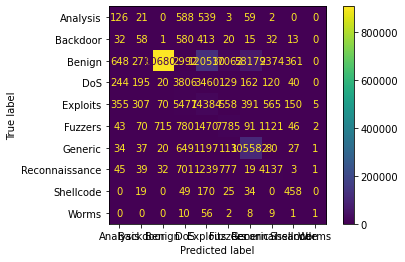

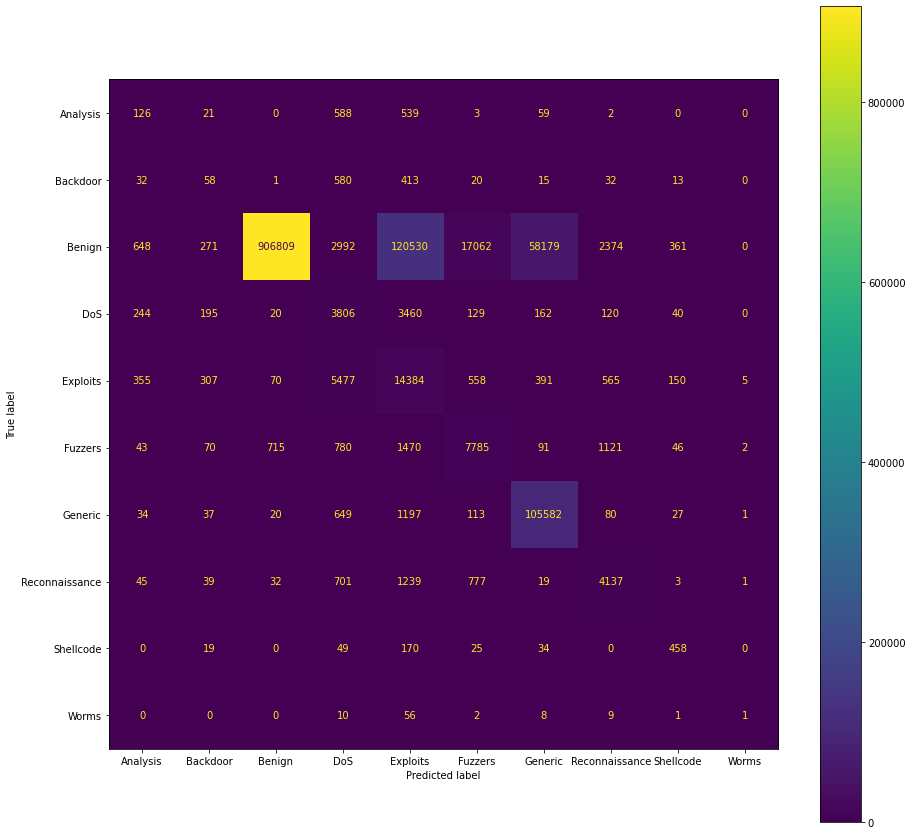

In [64]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)